In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import time
import emoji
from tqdm import tqdm,tqdm_notebook

In [2]:
df = pd.read_csv('../output/country/France.csv', encoding='utf-8')

In [3]:
# use google translator
# translator=Translator()
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.kr',
    ])

In [4]:
trans=translator.translate(df.text[1],dest='en',src='auto')
trans_text=dict()

In [5]:
def tran(error_index=None):
    new_error_index=[]
    if error_index :
        for idx in tqdm(error_index):
            text=emoji.demojize(df.text[idx])
            
            try:
                trans=translator.translate(text,dest='en',src='auto')
                trans_text[idx]=trans.text
            except:
                new_error_index.append(idx)
    else:
        old=time.time()
        error_index=[]
        for i in tqdm_notebook(range(len(df.text))):
            text = emoji.demojize(df.text[i])
            try:
                trans=translator.translate(text,dest='en',src='auto')
                trans_text[i]=trans.text
            except:
                error_index.append(i)
        print(time.time()-old)
    return new_error_index


In [6]:
e=tran()

HBox(children=(IntProgress(value=0, max=1990), HTML(value='')))


888.0044841766357


In [8]:
e=tran(e)

HBox(children=(IntProgress(value=0, max=1990), HTML(value='')))


242.1688747406006


In [11]:
len(e)

0

In [12]:
len(trans_text)

1986

In [13]:
len(df)

1990

In [33]:
list_trans=[trans_text[i] for i in range(len(df)) ]

In [34]:
df["trans_text"]=list_trans

In [35]:
df_english=df
df_english.head(10)

,id,longitude,latitude,place_country,place_full_name,text,user_id,user_name,user_followers,user_loc,lang,created_at,trans_text
0,1003504559875153921,9.046206,41.520942,France,"Pianottoli-Caldarello, France",Tout ça semble tellement simple... mais ça ne ...,1630482236,patrice salini,915,pianottoli caldarello,fr,2018-06-04 05:11:45,It all sounds so simple ... but it's not easy!...
1,1003545074322591744,1.582971,48.965238,France,"Boissy-Mauvoisin, France",La définition littérale d’un bug https://t.co/...,34577688,Pierre Dandumont,3651,Dans ma campagne.,fr,2018-06-04 07:52:45,The literal definition of a bug https://t.co/d...
2,1003547782718939136,2.347003,48.858834,France,"Paris, France","@pipedrive Hello, we are a paid customer (@mad...",1264922016,Youssef Rahoui,664,Paris,en,2018-06-04 08:03:31,"@pipedrive Hello, we are a paid customer (@mad..."
3,1003548448514347009,2.347003,48.858834,France,"Paris, France",Je plussoie ++ #vegetalisonsparis https://t.co...,1095432156,Agathe Lélu,962,Paris,fr,2018-06-04 08:06:09,I more than +++vegetalisonsparis https://t.co/...
4,1003555075699200000,2.347003,48.858834,France,"Paris, France",@jlmoudenc un exemple à prendre pour #Toulouse...,811609616408870912,Kiricus,44,"Toulouse, France",fr,2018-06-04 08:32:29,@jlmoudenc an example to take for #Toulouse! w...
5,1003582954491334657,2.347003,48.858834,France,"Paris, France",Or she just hasn't found the right person and ...,419805802,ALRII,641,London,en,2018-06-04 10:23:16,Or she just hasn't found the right person and ...
6,1003599476341305350,2.332870,48.911783,France,"Saint-Ouen, France",#SEDD JB Renard chercheur au @CNRS fait l'inve...,404175902,M-Christine Lanne,16498,France,fr,2018-06-04 11:28:55,#SEDD JB Renard researcher at @CNRS makes an i...
7,1003601298397237248,2.445818,48.910630,France,"Seine-Saint-Denis, Ile-de-France",#SEDD Jean Baptiste #RENARD Chercheur au @CNRS...,92739201,François GARREAU,13106,PARIS 15,fr,2018-06-04 11:36:10,#SEDD Jean Baptiste #RENARD Researcher at @CNR...
8,1003602974533455872,2.332870,48.911783,France,"Saint-Ouen, France",#SEDD Pierre Souvet @Dr_ASEF explique qu'à #To...,404175902,M-Christine Lanne,16497,France,fr,2018-06-04 11:42:49,#SEDD Pierre Souvet @Dr_ASEF explains that at ...
9,1003605377966133249,3.874268,43.610396,France,"Montpellier, France",sınırdışı edilen iranlılara çok üzüldüm bugünü...,129581318,gestapo gündeş,5896,"Montpellier, France",tr,2018-06-04 11:52:22,I am very sorry that the deportees are not dep...


In [36]:
sentences = list(df_english['trans_text'])

In [37]:
neg = list()
neu = list()
pos = list()
compound = list()
analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    neg.append(vs['neg'])
    neu.append(vs['neu'])
    pos.append(vs['pos'])
    compound.append(vs['compound'])

In [38]:
df_english['neg'] = neg
df_english['neu'] = neu
df_english['pos'] = pos
df_english['compound'] = compound

In [40]:
df_english.to_csv('../output/france_with_vadersentiment_pop.csv',encoding="utf-8")

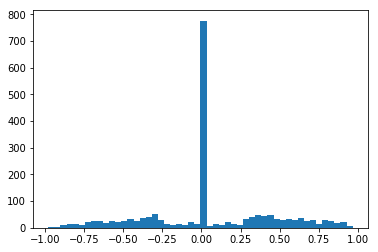

In [41]:
plt.hist(df_english['compound'],bins=50)
plt.show()